<a href="https://colab.research.google.com/github/Vayansh/XAI_on_Cat_vs_Dog_Classification/blob/main/Cat_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Downloading Dataset**

In [ ]:
!gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:23<00:00, 36.0MB/s]


# **Importing Libraries**

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
from google.colab.patches import cv2_imshow


# **Turning Dataset to Dataframe**

In [ ]:
foldername ='train/'
filename = os.listdir(foldername)



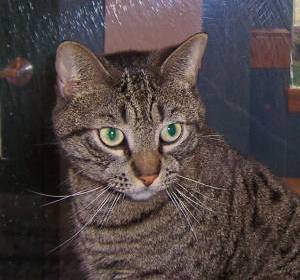

In [ ]:
img = cv2.imread('train/cat.1.jpg')
cv2_imshow(img)

In [ ]:
# consts
Batch = 32
img_height , img_width, ch = 256,256,3
img_shape = (img_width,img_height)

# Dataframe Building
category = []
for i in filename:
    cate = i.split('.')[0]
    if cate == 'cat':
        category.append('cat')
    else:
        category.append('dog')

df = pd.DataFrame({
    'filename': filename,
    'class':category
})







<Axes: ylabel='count'>

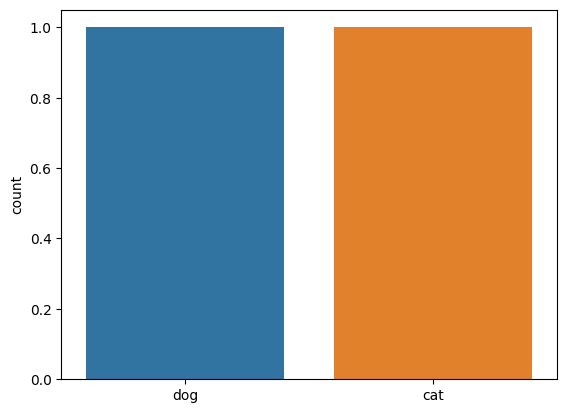

In [ ]:
sns.countplot(data=df,x = df['class'].unique())

In [ ]:
df

,filename,class
0,dog.9174.jpg,dog
1,cat.7597.jpg,cat
2,cat.2289.jpg,cat
3,dog.6539.jpg,dog
4,dog.7360.jpg,dog
...,...,...
24995,cat.1134.jpg,cat
24996,dog.1477.jpg,dog
24997,dog.2612.jpg,dog
24998,dog.2139.jpg,dog


# **Model Creation**

In [ ]:

#   Model
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (img_width,img_height,ch)))    # Ist Conv layer or Input layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16,(5,5),activation='relu'))    # Ist Conv layer or Input layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))                                        # 2nd Conv layer
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))                                        # 2nd Conv layer
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.3))
model.add(Conv2D(256,(3,3),activation='relu'))                                        # 2nd Conv layer
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.5))
model.add(Conv2D(256,(3,3),activation='relu'))                                          #3rd Conv layer
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.3))
model.add(Flatten())
# model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))          # 4th layer and Ist Dense layer
# model.add(Dropout(0.5))

model.add(Dense(units=2,activation='softmax'))                                          #6th layer and 3rd Dense layer or output layer
model.compile(optimizer= Adam(learning_rate=0.0002),loss= CategoricalCrossentropy(),metrics= [CategoricalAccuracy()])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 123, 123, 16)      12816     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 61, 61, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        9

# **Splitting of Dataset**

In [ ]:

# Spliting dataset into train and test
train_df,test_df = train_test_split(df,test_size=0.2,random_state=8)
test_df = test_df.reset_index(drop = True)
train_df,val_df = train_test_split(train_df,test_size = 0.1,random_state = 1234)
trian_df = train_df.reset_index(drop = True)
val_df = val_df.reset_index(drop = True)

# **Making Image Data Generator**

In [ ]:

# Train Image Generator
train_datagen = ImageDataGenerator(rescale= 1./255)
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    './train/',
    x_col= 'filename',
    y_col= 'class',
    target_size= img_shape,
    color_mode= 'rgb',
    class_mode= 'categorical',
    batch_size= Batch
)
#val Image generator
val_datagen = ImageDataGenerator(rescale = 1./255)
val_gen = val_datagen.flow_from_dataframe(
    val_df,
    "./train/",
    x_col = 'filename',
    y_col = 'class',
    target_size = img_shape,
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = Batch
)


# Test Image Generator
test_datagen = ImageDataGenerator(rescale= 1./255)
test_gen = test_datagen.flow_from_dataframe(
    test_df,
    './train/',
    x_col= 'filename',
    y_col= 'class',
    target_size= img_shape,
    color_mode= 'rgb',
    class_mode= 'categorical',
    batch_size= Batch
)



Found 18000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# **Training**

In [ ]:
callback = EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
checkpoint = ModelCheckpoint('dog_cat_30_eopchs_checkpoint.hdf5',moniter= 'loss', mode ='min')

history = model.fit(train_gen,epochs= 15 , validation_data= val_gen , callbacks= [callback,checkpoint])
model.save("cats_vs_dogs_30_epochs.h5")


Epoch 1/15
563/563 [==============================] - 126s 164ms/step - loss: 0.6489 - categorical_accuracy: 0.5948 - val_loss: 0.6088 - val_categorical_accuracy: 0.6595
Epoch 2/15
563/563 [==============================] - 90s 159ms/step - loss: 0.5644 - categorical_accuracy: 0.6998 - val_loss: 0.5799 - val_categorical_accuracy: 0.6825
Epoch 3/15
563/563 [==============================] - 90s 159ms/step - loss: 0.5067 - categorical_accuracy: 0.7500 - val_loss: 0.5079 - val_categorical_accuracy: 0.7610
Epoch 4/15
563/563 [==============================] - 91s 162ms/step - loss: 0.4537 - categorical_accuracy: 0.7824 - val_loss: 0.4537 - val_categorical_accuracy: 0.7890
Epoch 5/15
563/563 [==============================] - 92s 163ms/step - loss: 0.4026 - categorical_accuracy: 0.8146 - val_loss: 0.3995 - val_categorical_accuracy: 0.8235
Epoch 6/15
563/563 [==============================] - 94s 166ms/step - loss: 0.3619 - categorical_accuracy: 0.8372 - val_loss: 0.3738 - val_categorical_ac

# **View Training and Validation graphs for loss and accuracy**

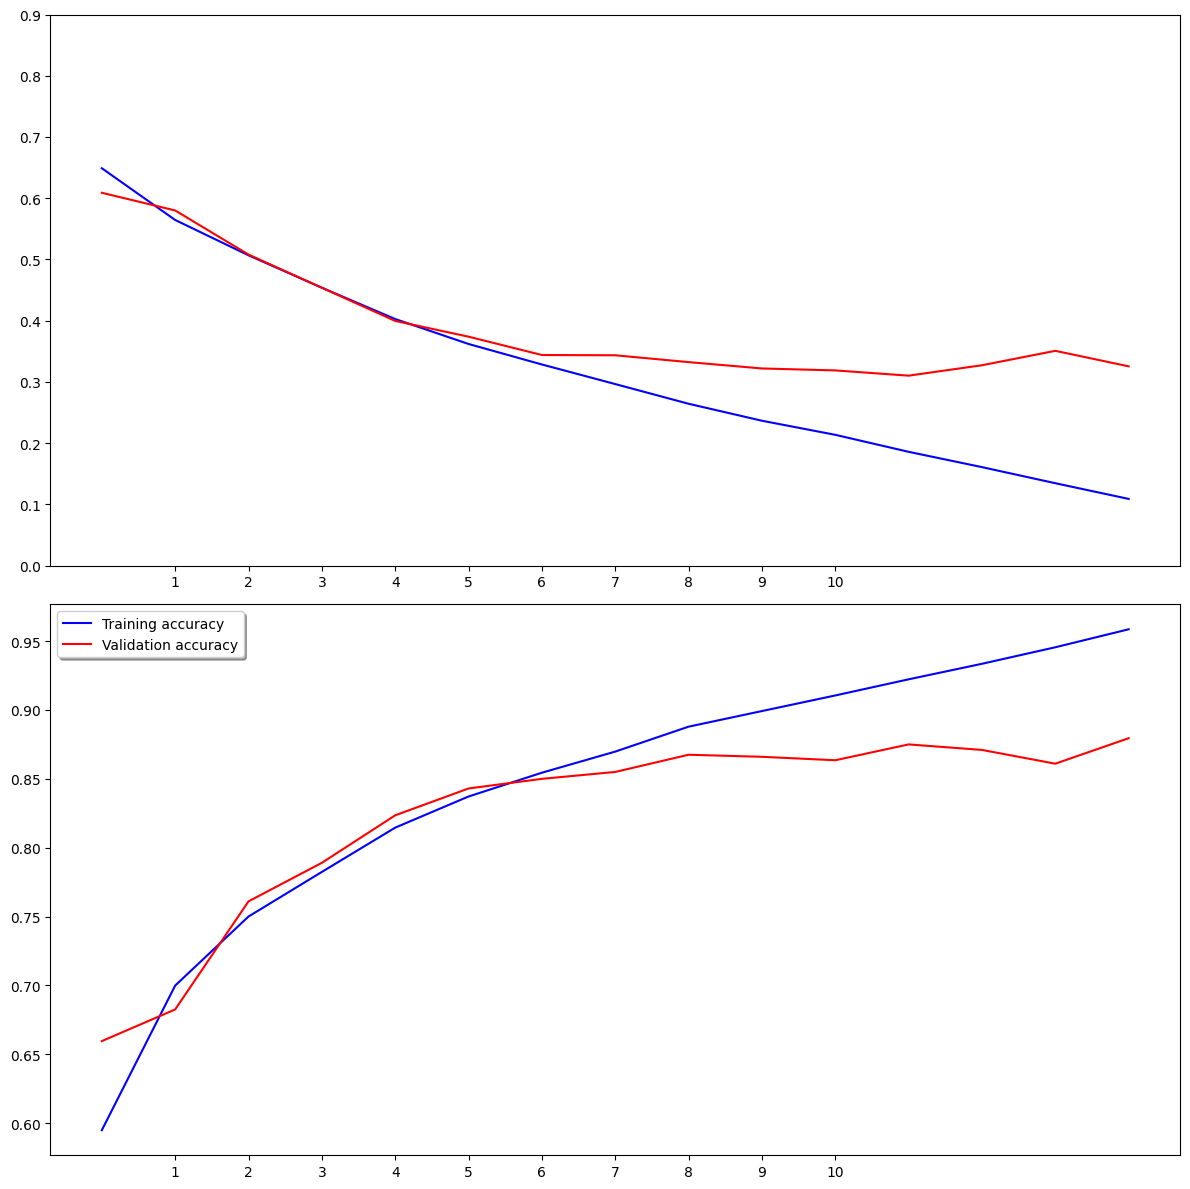

In [ ]:
import numpy as np
epochs = 11
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['categorical_accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_categorical_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# **Testing**

In [ ]:
foldername ='test1/'
filename = os.listdir(foldername)


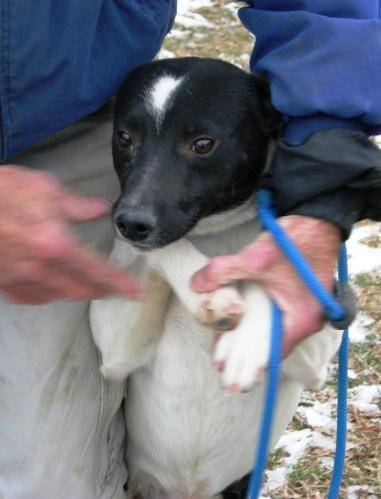

1/1 [==============================] - 0s 350ms/step
[[3.1093915e-13 1.0000000e+00]]
Dog


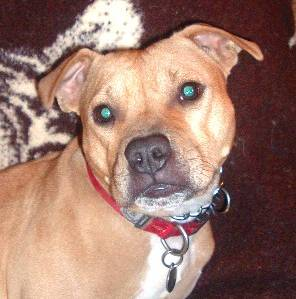

1/1 [==============================] - 0s 22ms/step
[[0.07963885 0.92036116]]
Dog


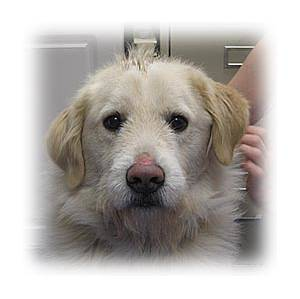

1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
Dog


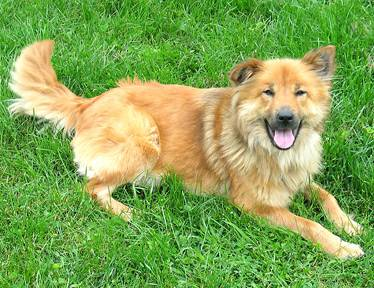

1/1 [==============================] - 0s 37ms/step
[[1. 0.]]
Cat


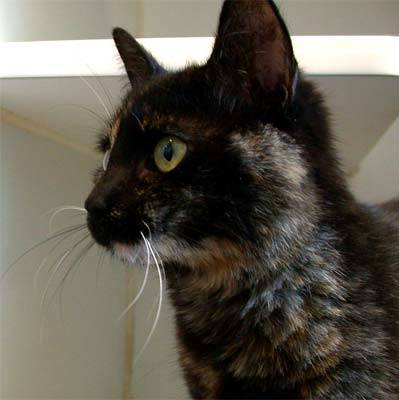

1/1 [==============================] - 0s 25ms/step
[[1. 0.]]
Cat


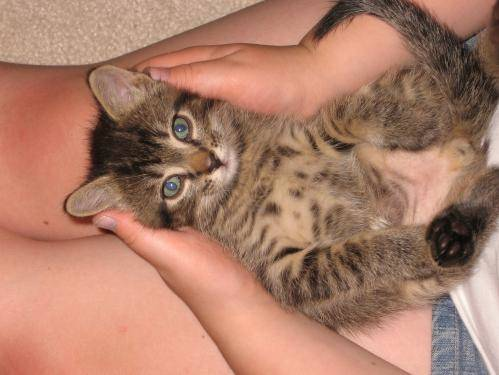

1/1 [==============================] - 0s 29ms/step
[[1.00000e+00 2.09109e-09]]
Cat


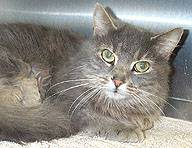

1/1 [==============================] - 0s 36ms/step
[[1. 0.]]
Cat


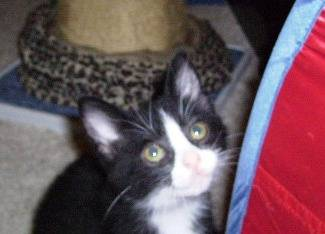

1/1 [==============================] - 0s 46ms/step
[[1. 0.]]
Cat


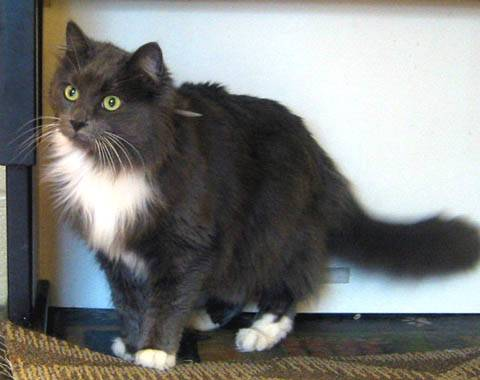

1/1 [==============================] - 0s 37ms/step
[[3.6361542e-10 1.0000000e+00]]
Dog


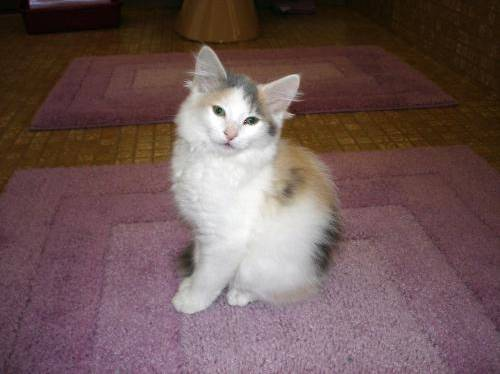

1/1 [==============================] - 0s 30ms/step
[[1. 0.]]
Cat


In [ ]:
for i in range(10):
  img = cv2.imread('test1/{}.jpg'.format(i+1))
  cv2_imshow(img)
  img = cv2.resize(img,(256,256),interpolation = cv2.INTER_CUBIC)
  img =  img.reshape((1,256,256,3))
  pred =  model.predict(img)
  print(pred)
  if pred[0][0] == 1:
    pred = 'Cat'
  else:
    pred = 'Dog'
  print(pred)

# **Accuracy**

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = []
for i in tqdm(range(157)):
  k = model.predict(test_gen[i][0],verbose = 0)
  for j in k:
    y_pred.append(np.argmax(j))
y_pred = np.array(y_pred)

100%|██████████| 157/157 [00:31<00:00,  4.93it/s]


In [ ]:
y_test = []
for i in tqdm(range(157)):
  for j in test_gen[i][1]:
    y_test.append(np.argmax(j))
y_test = np.array(y_test)

100%|██████████| 157/157 [00:17<00:00,  9.20it/s]


In [ ]:
accuracy_score(y_test,y_pred)

0.867

# Lime Explainer

In [ ]:
!pip install lime

In [ ]:
from lime import lime_image

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=123)

explainer

In [ ]:
# import skimage
def make_prediction(color_img):
    gray_img = color_img.reshape(-1,256,256,3)
    preds = model.predict(gray_img,verbose = 0)
    return preds

In [ ]:
explanation = explainer.explain_instance(X_test[0].squeeze(), make_prediction, random_seed=123)

explanation

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
y_test = test_gen[0][1][:3]

In [ ]:
labels = {'Cat' : y_test[0],'Dog':y_test[1]}

In [ ]:
img, mask = explanation.get_image_and_mask(labels, positive_only=True, hide_rest=True)

TypeError: ignored

# Shap Explainer

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.5 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
X_test = test_gen[0][0][:3]

In [ ]:
X_test.shape

(3, 256, 256, 3)

In [ ]:
def predict(img):
  k = model.predict(img,verbose = 0)
  ans = np.zeros((img.shape[0],10))
  for i in range(len(k)):
    for j in range(2):
      ans[i][j] = k[i][j]
  return ans

In [ ]:
predict(X_test)

array([[9.93700504e-01, 6.29945239e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.98843908e-01, 1.15607597e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.50509449e-04, 9.99049485e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [ ]:
masker = shap.maskers.Image("inpaint_telea", X_test[0].shape)
explainer = shap.Explainer(predict,masker,output_names = ['Cat','Dog',0,0,0,0,0,0,0,0])
explainer

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:25, 25.55s/it]               


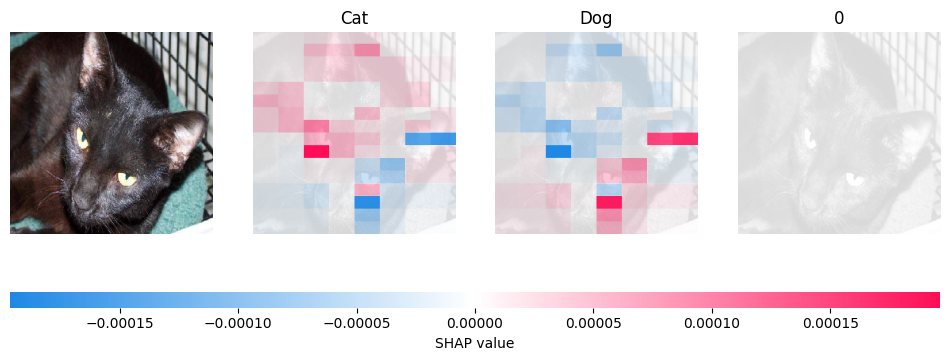

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:18, 18.53s/it]               


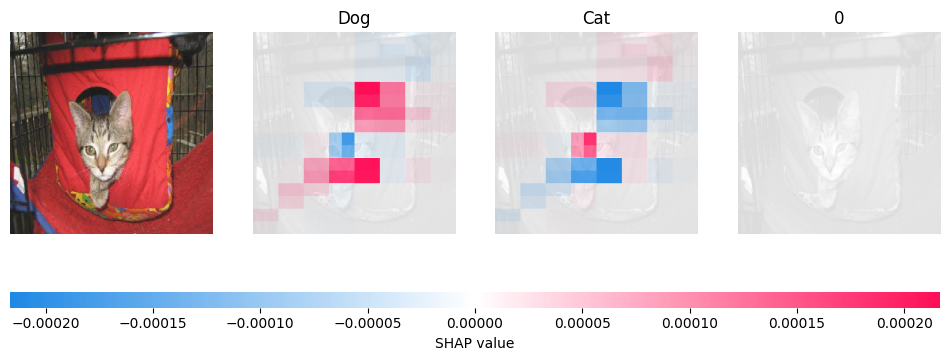

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:23, 23.64s/it]               


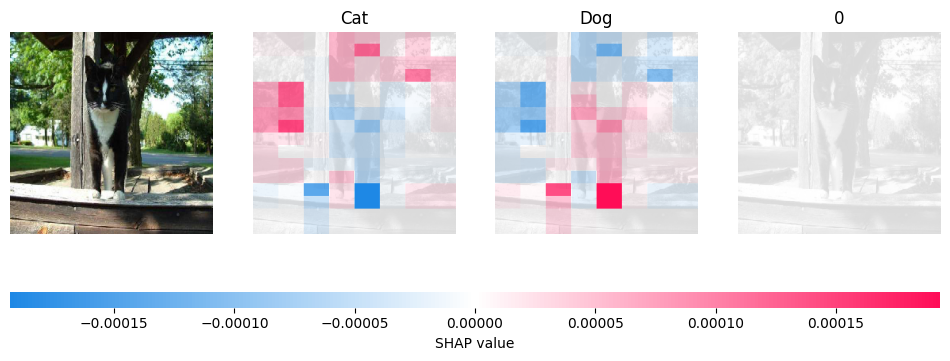

In [ ]:
for i in X_test:
  shap_values = explainer(i.reshape(1,256,256,3), outputs=shap.Explanation.argsort.flip[:3])
  shap_values.data = np.array(shap_values.data*255,dtype = np.int32)
  shap.image_plot(shap_values)
